In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

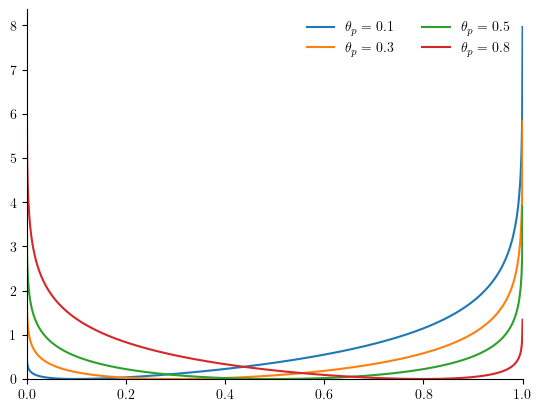

In [19]:
def kl_bernoulli(theta_p, theta_q):
    eps = 1e-12
    theta_q = np.clip(theta_q, eps, 1 - eps)
    theta_p = np.clip(theta_p, eps, 1 - eps)
    return (theta_p * np.log(theta_p / theta_q)
            + (1 - theta_p) * np.log((1 - theta_p) / (1 - theta_q)))

theta_q = np.linspace(1e-4, 1 - 1e-4, 1000)
theta_p_list = [0.1, 0.3, 0.5, 0.8]

plt.figure()
for tp in theta_p_list:
    plt.plot(theta_q, kl_bernoulli(tp, theta_q), label=fr"$\theta_p={tp}$")

plt.ylim(bottom=0)
plt.xlim(0, 1)
plt.legend(frameon=False, ncol=2)
plt.gca().spines[['top','right']].set_visible(False)
plt.savefig("../../../figs/probability/bernoulli_kl_theta.pdf", bbox_inches="tight", transparent=True)
plt.show()

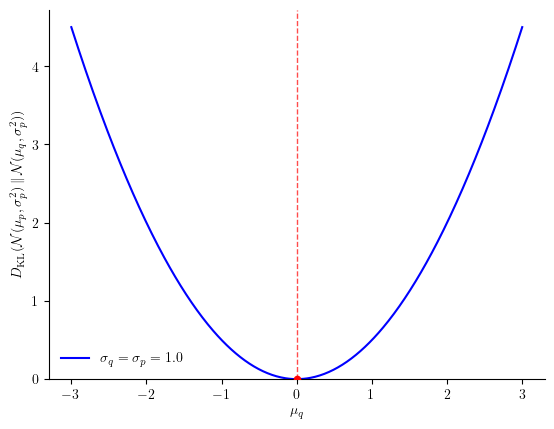

In [21]:
def kl_gaussian_same_var(mu_p, sigma_p, mu_q):
    # KL when sigma_q = sigma_p (pure mean misspecification)
    # closed form reduces to 0.5 * ((mu_q - mu_p)^2) / sigma_p^2
    return 0.5 * ((mu_q - mu_p)**2) / (sigma_p**2)

# parameters for the "true" p
mu_p = 0.0
sigma_p = 1.0

# Sweep mu_q over a range
mu_q = np.linspace(-3.0, 3.0, 500)

plt.figure()
plt.plot(mu_q, kl_gaussian_same_var(mu_p, sigma_p, mu_q), label=fr"$\sigma_q=\sigma_p={sigma_p}$", color="blue")

# Mark the minimum at mu_q = mu_p
plt.axvline(mu_p, linestyle="--", linewidth=1, alpha=0.7, color="red")
plt.scatter([mu_p], [0.0], s=20, zorder=3, color="red")

plt.xlabel(r"$\mu_q$")
plt.ylabel(r"$D_{\mathrm{KL}}(\mathcal N(\mu_p,\sigma_p^2)\,\Vert\,\mathcal N(\mu_q,\sigma_p^2))$")
# plt.title(r"Gaussian KL vs. $\mu_q$ (min at $\mu_q=\mu_p$)")
plt.ylim(bottom=0)
plt.legend(frameon=False)
plt.gca().spines[['top','right']].set_visible(False)
plt.savefig("../../../figs/probability/gaussian_kl_mu.pdf", bbox_inches="tight", transparent=True)
plt.show()